<a href="https://colab.research.google.com/github/CameronDHarris/jazzflow/blob/main/benWebsterBot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports/Installs

In [ ]:
pip install pretty_midi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 45.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 KB 2.4 MB/s eta 0:00:00
  Created wheel for pretty_midi: filename=pretty_midi-0.2.9-py3-none-any.whl size=5591954 sha256=7bb91e8d3403bbe4a69ce3d33bccf1a26df3f3000de84deadaef45c72b405475
  Stored in directory: /root/.cache/pip/wheels/2a/5a/e3/30eeb9a99350f3f7e21258fcb132743eef1a4f49b3505e76b6
Successfully built pretty_midi


In [ ]:
import os
import numpy as np
import pretty_midi
import seaborn as sns
import librosa, librosa.display
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Functions

In [ ]:
import pretty_midi
import numpy as np

def midi_file_stats(midi_file):
  midi_data = pretty_midi.PrettyMIDI(midi_file)
  estimated_tempo = midi_data.estimate_tempo()
  pitch_class_histogram = midi_data.get_pitch_class_histogram()
  pitch_class_matrix = midi_data.get_pitch_class_transition_matrix()
  return {'est_tempo':estimated_tempo, 'histogram':pitch_class_histogram, 'transition_matrix':pitch_class_matrix}

def midi_to_dataset(midi_file, num_timesteps, pitch_range):
    # Load the MIDI file using pretty_midi
    midi_data = pretty_midi.PrettyMIDI(midi_file)
    print(midi_data.estimate_tempo())
    # Get the piano roll representation of the MIDI file
    piano_roll = midi_data.get_piano_roll(fs=4)

    # Transpose the piano roll to the desired pitch range
    piano_roll = piano_roll[pitch_range[0]:pitch_range[1], :]

    # Initialize empty arrays for inputs and outputs
    inputs = []
    outputs = []

    # Split the piano roll into input/output pairs of length num_timesteps
    for i in range(0, piano_roll.shape[1] - num_timesteps, num_timesteps):
        inputs.append(piano_roll[:, i:i+num_timesteps])
        outputs.append(piano_roll[:, i+num_timesteps])

    # Convert inputs and outputs to numpy arrays
    inputs = np.array(inputs)
    outputs = np.array(outputs)

    return inputs, outputs

# Example usage
#midi_file = '/content/BenWebster_ByeByeBlackbird_FINAL.mid'
#num_timesteps = 32
#pitch_range = (24, 84)

#inputs, outputs = midi_to_dataset(midi_file, num_timesteps, pitch_range)

# EDA

In [ ]:
stats = midi_file_stats('/content/BenWebster_ByeByeBlackbird_FINAL.mid')

NameError: ignored

In [ ]:
sns.histplot(stats['histogram'])

In [ ]:
test_data = pretty_midi.PrettyMIDI('/content/BenWebster_ByeByeBlackbird_FINAL.mid')

In [ ]:
print(test_data.instruments)
print(test_data.get_tempo_changes())
print(test_data.estimate_tempi())

[Instrument(program=0, is_drum=False, name="Melody")]
(array([0.]), array([141.00030315]))
(array([190.64829722, 187.30003016, 172.70850529, 179.40396425,
       158.1311811 , 188.2909767 , 191.83035043, 145.7445933 ,
       166.08624666, 143.2384032 , 164.50035368, 185.24380003,
       132.79916428, 151.36134779, 175.14270558, 191.22543636,
       189.88417579, 162.92111257, 150.95943237, 132.92336271,
       147.66577203, 123.14810404, 157.70130993, 156.78798188,
       194.52975956, 188.52408221, 192.54664442, 159.06027147,
       192.27314066,  98.22952905, 190.38015615, 190.38015615,
       183.85098951, 191.32196611, 190.64829722, 176.94155689,
       159.48193346, 186.0622557 , 182.61084793, 148.95217719,
       163.08468798, 120.32025869, 119.39165691, 184.47739833,
       185.4250562 , 150.67935921,  87.32922002, 184.16366126,
       101.39347642, 189.31509234, 185.4250562 , 169.55360045,
       184.58221503, 188.0004042 ,  91.35677684, 188.0004042 ,
       191.54758164, 119.2

In [ ]:
print(test_data.get_pitch_class_transition_matrix())

[[ 1.  2.  1.  0.  1.  0.  0.  2.  0.  1.  3. 16.]
 [ 1.  0.  4.  0.  1.  0.  0.  0.  0.  0.  1.  1.]
 [ 3.  3.  2.  4. 12.  2.  1.  0.  2.  0.  2. 11.]
 [ 1.  1.  1.  1.  7.  0.  0.  0.  0.  0.  0.  0.]
 [ 5.  1.  8.  1.  3.  8.  3.  3.  0.  0.  0.  1.]
 [ 0.  0.  6.  3.  4.  2.  4.  2.  0.  2.  0.  0.]
 [ 0.  0.  2.  0.  2.  0.  0.  7.  0.  1.  1.  2.]
 [ 0.  0.  8.  0.  1.  4.  1.  4.  8.  6.  3.  6.]
 [ 1.  0.  2.  0.  0.  2.  1.  0.  0.  3.  0.  8.]
 [ 0.  0.  2.  0.  4.  1.  3.  4.  3.  5.  1.  7.]
 [ 2.  1.  1.  0.  1.  0.  0.  3.  0.  0.  0.  6.]
 [13.  1. 15.  0.  2.  2.  2.  3.  1. 13.  2.  5.]]


Text(0, 0.5, 'Proportion')

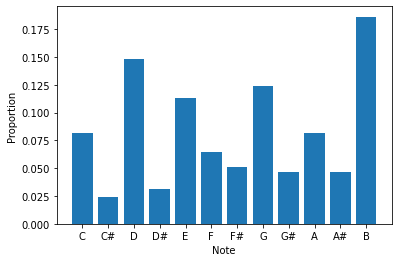

In [ ]:
plt.bar(np.arange(12), test_data.get_pitch_class_histogram());
plt.xticks(np.arange(12), ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'])
plt.xlabel('Note')
plt.ylabel('Proportion')

Text(0, 0.5, 'Proportion')

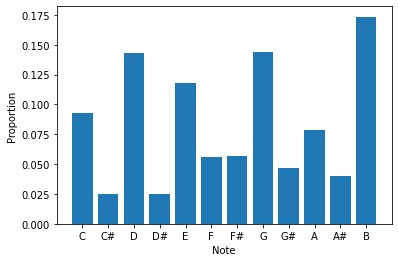

In [ ]:
plt.bar(np.arange(12), test_data.get_pitch_class_histogram(use_duration=True));
plt.xticks(np.arange(12), ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'])
plt.xlabel('Note')
plt.ylabel('Proportion')

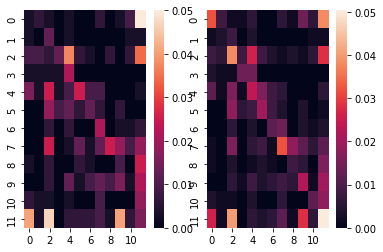

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2)
sns.heatmap(test_data.get_pitch_class_transition_matrix(normalize=True), ax=ax1)
sns.heatmap(test_data.get_pitch_class_transition_matrix(time_thresh=0.1, normalize=True), ax=ax2)

In [ ]:
transition_matrix = test_data.get_pitch_class_transition_matrix()
print(transition_matrix)

[[ 1.  2.  1.  0.  1.  0.  0.  2.  0.  1.  3. 16.]
 [ 1.  0.  4.  0.  1.  0.  0.  0.  0.  0.  1.  1.]
 [ 3.  3.  2.  4. 12.  2.  1.  0.  2.  0.  2. 11.]
 [ 1.  1.  1.  1.  7.  0.  0.  0.  0.  0.  0.  0.]
 [ 5.  1.  8.  1.  3.  8.  3.  3.  0.  0.  0.  1.]
 [ 0.  0.  6.  3.  4.  2.  4.  2.  0.  2.  0.  0.]
 [ 0.  0.  2.  0.  2.  0.  0.  7.  0.  1.  1.  2.]
 [ 0.  0.  8.  0.  1.  4.  1.  4.  8.  6.  3.  6.]
 [ 1.  0.  2.  0.  0.  2.  1.  0.  0.  3.  0.  8.]
 [ 0.  0.  2.  0.  4.  1.  3.  4.  3.  5.  1.  7.]
 [ 2.  1.  1.  0.  1.  0.  0.  3.  0.  0.  0.  6.]
 [13.  1. 15.  0.  2.  2.  2.  3.  1. 13.  2.  5.]]


In [ ]:
normalized_transition_matrix = (transition_matrix / transition_matrix.sum(axis=1)[:, None])
normalized_transition_matrix.sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
print(normalized_transition_matrix)

[[0.03703704 0.07407407 0.03703704 0.         0.03703704 0.
  0.         0.07407407 0.         0.03703704 0.11111111 0.59259259]
 [0.125      0.         0.5        0.         0.125      0.
  0.         0.         0.         0.         0.125      0.125     ]
 [0.07142857 0.07142857 0.04761905 0.0952381  0.28571429 0.04761905
  0.02380952 0.         0.04761905 0.         0.04761905 0.26190476]
 [0.09090909 0.09090909 0.09090909 0.09090909 0.63636364 0.
  0.         0.         0.         0.         0.         0.        ]
 [0.15151515 0.03030303 0.24242424 0.03030303 0.09090909 0.24242424
  0.09090909 0.09090909 0.         0.         0.         0.03030303]
 [0.         0.         0.26086957 0.13043478 0.17391304 0.08695652
  0.17391304 0.08695652 0.         0.08695652 0.         0.        ]
 [0.         0.         0.13333333 0.         0.13333333 0.
  0.         0.46666667 0.         0.06666667 0.06666667 0.13333333]
 [0.         0.         0.19512195 0.         0.02439024 0.09756098
  0.0

## Markov Chain Generation

Here I am assuming that only the previous note matters for the conditional probability of the next note.

In [ ]:
generating_seed = 8
# categories correspond to the pitch classes in pretty_midi (0 = C, 1 = C#, ..., 11 = B)
categories = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
notes = np.array([])
notes = np.append(notes, generating_seed)
for note in range(100):
  probs = normalized_transition_matrix[generating_seed]
  next_generating_seed = np.random.choice(categories, p=probs)
  notes = np.append(notes, next_generating_seed)
  generating_seed = next_generating_seed

# add to MIDI file
markov_generation = pretty_midi.PrettyMIDI(initial_tempo=200)
inst = pretty_midi.Instrument(program=66, is_drum=False, name='Tenor Sax')
markov_generation.instruments.append(inst)
velocity = 100
for pitch, start, end in zip(notes, [x for x in range(len(notes))], [x+1.0 for x in range(len(notes))]):
    inst.notes.append(pretty_midi.Note(int(velocity), int(pitch)+48, start, end))
print(inst.notes)

[Note(start=0.000000, end=1.000000, pitch=56, velocity=100), Note(start=1.000000, end=2.000000, pitch=59, velocity=100), Note(start=2.000000, end=3.000000, pitch=55, velocity=100), Note(start=3.000000, end=4.000000, pitch=50, velocity=100), Note(start=4.000000, end=5.000000, pitch=59, velocity=100), Note(start=5.000000, end=6.000000, pitch=56, velocity=100), Note(start=6.000000, end=7.000000, pitch=54, velocity=100), Note(start=7.000000, end=8.000000, pitch=57, velocity=100), Note(start=8.000000, end=9.000000, pitch=50, velocity=100), Note(start=9.000000, end=10.000000, pitch=59, velocity=100), Note(start=10.000000, end=11.000000, pitch=48, velocity=100), Note(start=11.000000, end=12.000000, pitch=55, velocity=100), Note(start=12.000000, end=13.000000, pitch=50, velocity=100), Note(start=13.000000, end=14.000000, pitch=52, velocity=100), Note(start=14.000000, end=15.000000, pitch=48, velocity=100), Note(start=15.000000, end=16.000000, pitch=59, velocity=100), Note(start=16.000000, end=

In [ ]:
markov_generation.write('test_file2.mid')

In [ ]:
total_velocity = sum(sum(test_data.get_chroma()))
relative_velocities = [sum(semitone)/total_velocity for semitone in test_data.get_chroma()]

In [ ]:
print(relative_velocities)

[0.0909190398218974, 0.02406386178705025, 0.1499499190679631, 0.025388583215122877, 0.12209428973148073, 0.056732680387765036, 0.05568311746245493, 0.14628113903112938, 0.047383544896174565, 0.07606569200800044, 0.03857326147249405, 0.1668648711184672]


In [ ]:
note_onsets = test_data.get_onsets()
diffs = np.diff(note_onsets)

In [ ]:
df = pd.DataFrame(diffs)
df.head()

,0
0,0.119681
1,0.339095
2,0.093085
3,0.334662
4,0.562942


In [ ]:
for i in range(1, 20):
  print(df[0].autocorr(lag=i))

-0.10715865506458105
-0.009365891233449719
-0.029572998655734026
0.006918118671287464
-0.011372083819947925
-0.07414209123533516
0.00015655590516185382
-0.010029621020523101
-0.022774914803371536
-0.01268020981272752
0.04105423018370424
-0.05573869157264071
0.07558720595490699
-0.028875628754764376
-0.020163301584180525
-0.04321019764270097
-0.006882774503549483
0.019852556638214093
0.027637428152013116


In [ ]:
instrument = test_data.instruments[0]
notes_array = instrument.notes
print(notes_array)

[Note(start=9.310707, end=9.410441, pitch=59, velocity=97), Note(start=9.430388, end=9.767266, pitch=60, velocity=104), Note(start=9.769483, end=9.858135, pitch=59, velocity=102), Note(start=9.862567, end=10.177283, pitch=60, velocity=108), Note(start=10.197230, end=10.567353, pitch=59, velocity=97), Note(start=10.760172, end=11.021696, pitch=60, velocity=108), Note(start=11.037210, end=11.112565, pitch=59, velocity=98), Note(start=11.125863, end=11.447227, pitch=60, velocity=102), Note(start=11.500419, end=11.784106, pitch=59, velocity=95), Note(start=12.872313, end=13.277897, pitch=59, velocity=105), Note(start=13.293411, end=13.610343, pitch=60, velocity=105), Note(start=13.634722, end=13.991548, pitch=59, velocity=101), Note(start=14.031441, end=14.374969, pitch=61, velocity=111), Note(start=14.423728, end=14.818231, pitch=64, velocity=109), Note(start=14.853691, end=15.179489, pitch=62, velocity=109), Note(start=15.308034, end=15.452094, pitch=59, velocity=101), Note(start=15.7690

### Pitch Differences

In [ ]:
pitches = np.array([])
for note in notes_array:
  pitches = np.append(pitches, note.pitch)
pitch_diff = np.diff(pitches)

In [ ]:
df['pitch_differences'] = pd.Series(pitch_diff)
df['abs_pitch_differences'] = pd.Series(abs(pitch_diff))

for i in range(1, 15):
  print(df['pitch_differences'].autocorr(lag=i))

-0.11743683657315508
-0.08221977930119176
-0.17463369167872905
-0.08201901021648934
-0.06027271152641812
0.024730635033375914
0.12049532250018831
0.04660158582486218
-0.038033149656083176
-0.12926461937586606
0.005062574143961646
-0.08358514200545225
0.08281810434995666
0.0005361159198904945


In [ ]:
for i in range(1, 15):
  print(df['abs_pitch_differences'].autocorr(lag=i))

0.004316836106453496
-0.12639900243843888
0.07759911796162233
0.1003851307652579
-0.10237315261558735
0.018005640869022548
0.043189593788525237
0.046050536390237956
-0.02539290294636359
-0.09414363547343091
-0.02540372368081871
-0.04747862190373646
-0.05976333050462661
-0.016532632220049442


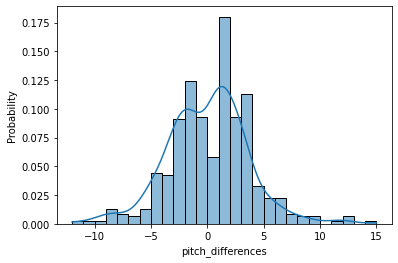

In [ ]:
sns.histplot(df['pitch_differences'], stat='probability', kde=True, binwidth=1)

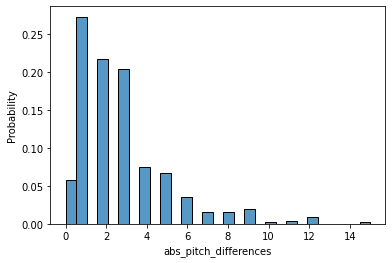

In [ ]:
sns.histplot(df['abs_pitch_differences'], stat='probability')

### Note Velocity

In [ ]:
velocities = np.array([])
for note in notes_array:
  velocities = np.append(velocities, note.velocity)

df['velocities'] = pd.Series(velocities)

for i in range(1, 15):
  print(df['velocities'].autocorr(lag=i))

velocity_autocorr = [df['velocities'].autocorr(lag=i) for i in range(1, 20)]
print(velocity_autocorr)

0.20053192938119485
0.20384710634049216
0.09642201219541524
0.17664111525334592
0.1441390460992251
0.05854204982299221
0.17299645922945725
0.05962780554886093
0.11538412097348233
0.03217629204087941
0.11414962063032061
0.12712547013594033
0.010838262511584455
0.16573222293226592
[0.20053192938119485, 0.20384710634049216, 0.09642201219541524, 0.17664111525334592, 0.1441390460992251, 0.05854204982299221, 0.17299645922945725, 0.05962780554886093, 0.11538412097348233, 0.03217629204087941, 0.11414962063032061, 0.12712547013594033, 0.010838262511584455, 0.16573222293226592, 0.09872356650791976, 0.15346117010440075, 0.04684346619531862, 0.1056026136640485, 0.10323806314380926]


In [ ]:
print(velocities)

[ 97. 104. 102. 108.  97. 108.  98. 102.  95. 105. 105. 101. 111. 109.
 109. 101. 105. 101. 103.  98. 109.  89. 102. 105. 111. 104. 109.  95.
 118. 112. 103. 113. 106. 118. 111. 100.  99.  97.  99.  92.  90. 103.
  94.  90. 105. 114. 105. 115. 109. 103. 105. 113. 114. 104.  95. 101.
  91.  90.  94.  94. 106. 101.  99.  89.  99.  91.  99.  99.  80.  95.
 107. 104. 108. 107. 105. 100. 120. 103. 114.  97.  99. 106. 103. 102.
 106. 110.  94.  94.  99.  97.  91.  89.  89.  98.  96.  86.  94.  87.
  97. 103.  91.  98. 100.  98.  99. 102.  95.  89.  99.  97. 110. 103.
 106. 108. 100. 101. 105. 118. 112.  98. 102. 101. 115.  91. 101.  98.
  90. 114. 108. 122.   9. 109. 108. 103. 107.  98. 109.  96. 101. 103.
 116. 103.  86. 115.  81. 106.  88. 105.  87.  95. 100.  97.  95.  92.
 112.  93.  93.  96. 102.  97.  94.  95.  99.  89.  96. 100. 112. 107.
 107.  98. 112.  98. 104. 104. 108.  96.  98. 107. 100.  96.  84.  92.
 103.  91.  86.  91. 112. 108.  94.  89.  97.  88.  82.  89.  89. 102.
  90. 

In [ ]:
df.head()

,0,pitch_differences,abs_pitch_differences,velocities,note_lengths,pitch
0,0.119681,1.0,1.0,59.0,0.099734,59.0
1,0.339095,-1.0,1.0,60.0,0.336879,60.0
2,0.093085,1.0,1.0,59.0,0.088652,59.0
3,0.334662,-1.0,1.0,60.0,0.314716,60.0
4,0.562942,1.0,1.0,59.0,0.370123,59.0


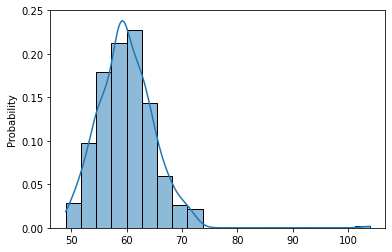

In [ ]:
sns.histplot(velocities, stat='probability', kde=True, bins=20)

In [ ]:
df.corr()

,0,pitch_differences,abs_pitch_differences,velocities
0,1.000000,-0.061628,0.248994,-0.044195
pitch_differences,-0.061628,1.000000,0.015578,-0.385301
abs_pitch_differences,0.248994,0.015578,1.000000,-0.070434
velocities,-0.044195,-0.385301,-0.070434,1.000000


In [ ]:
# check for cointegration between our time series
import statsmodels.tsa.stattools as ts 
velocity_pitch_diff_coint = ts.coint(df['velocities'], df['pitch_differences'])
print(velocity_pitch_diff_coint)

(-3.5901058964599244, 0.025200676670241073, array([-3.92099806, -3.34977208, -3.05390937]))


In [ ]:
import statsmodels.api as sm
X = df['pitch_differences']
X = sm.add_constant(X)
Y = df['velocities']
velocity_model = sm.OLS(Y, X)
velocity_reg = velocity_model.fit()
print(velocity_reg.params)
print(velocity_reg.tvalues)
print(velocity_reg.summary())

const                102.675556
pitch_differences     -0.181076
dtype: float64
const                237.219575
pitch_differences     -1.511743
dtype: float64
                            OLS Regression Results                            
Dep. Variable:             velocities   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.285
Date:                Sun, 19 Feb 2023   Prob (F-statistic):              0.131
Time:                        22:46:51   Log-Likelihood:                -1635.3
No. Observations:                 450   AIC:                             3275.
Df Residuals:                     448   BIC:                             3283.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t  

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


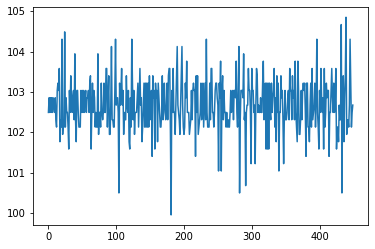

In [ ]:
stationary_timeseries = coeffs.predict(X)

plt.plot(stationary_timeseries)

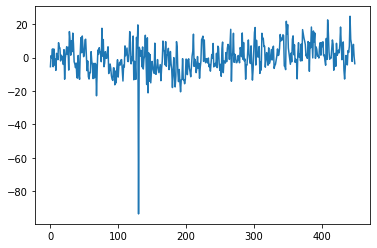

In [ ]:
residual = df['velocities'] - stationary_timeseries

plt.plot(residual)

Text(0, 0.5, 'Autocorrelation')

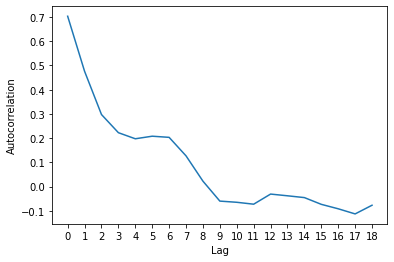

In [ ]:
plt.plot(np.arange(19), velocity_autocorr);
plt.xticks(np.arange(19))
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')

### Note Lengths

In [ ]:
note_lengths = np.array([])
for note in notes_array:
  note_lengths = np.append(note_lengths, note.end - note.start)

df['note_lengths'] = pd.Series(note_lengths)

for i in range(1, 15):
  print(df['note_lengths'].autocorr(lag=i))

note_length_autocorr = [df['note_lengths'].autocorr(lag=i) for i in range(1, 20)]
print(note_length_autocorr)

-0.023875934431557083
0.07552683211534453
0.03839679263396763
0.06547358391116773
0.0035883991242379723
0.04294822358566039
0.00838443658781366
0.016853189562664846
-0.037715235261214466
0.0880282448114739
0.07921024809343846
-0.026630123968682803
-0.014708137717257356
-0.05681884198167854
[-0.023875934431557083, 0.07552683211534453, 0.03839679263396763, 0.06547358391116773, 0.0035883991242379723, 0.04294822358566039, 0.00838443658781366, 0.016853189562664846, -0.037715235261214466, 0.0880282448114739, 0.07921024809343846, -0.026630123968682803, -0.014708137717257356, -0.05681884198167854, 0.053887011330169175, -0.019662791270126947, 0.012201656759489697, -0.02744237635647326, -0.02268996790501803]


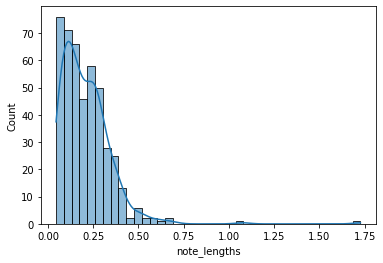

In [ ]:
sns.histplot(df['note_lengths'], kde=True)

In [ ]:
pitch = np.array([])
for note in notes_array:
  pitch = np.append(pitch, note.pitch)

df['pitch'] = pd.Series(pitch)

df.groupby(['pitch']).agg({'note_lengths':'mean',
                           'note_lengths':'min',
                           'note_lengths':'max',
                           'pitch':'count'}
                          )

,note_lengths,pitch
pitch,,
49.0,0.246010,1
50.0,0.385637,8
51.0,0.507534,4
52.0,0.503102,15
53.0,0.305850,10
54.0,0.618350,19
55.0,0.363474,34
56.0,0.281471,20
57.0,0.540779,27


In [ ]:
df.corr()

,0,pitch_differences,abs_pitch_differences,velocities,note_lengths,pitch
0,1.000000,-0.061628,0.248994,-0.044195,0.551211,-0.044195
pitch_differences,-0.061628,1.000000,0.015578,-0.385301,-0.120783,-0.385301
abs_pitch_differences,0.248994,0.015578,1.000000,-0.070434,0.069015,-0.070434
velocities,-0.044195,-0.385301,-0.070434,1.000000,0.100938,1.000000
note_lengths,0.551211,-0.120783,0.069015,0.100938,1.000000,0.100938
pitch,-0.044195,-0.385301,-0.070434,1.000000,0.100938,1.000000


In [ ]:
note_length_pitch_differences_coint = ts.coint(df['note_lengths'], df['pitch_differences'])
print(note_length_pitch_differences_coint)

(-21.034689204322735, 0.0, array([-3.92099806, -3.34977208, -3.05390937]))


In [ ]:
X = df['pitch_differences']
X = sm.add_constant(X)
Y = df['note_lengths']
note_lengths_model = sm.OLS(Y, X)
note_lengths_reg = note_lengths_model.fit()
print(note_lengths_reg.params)
print(note_lengths_reg.tvalues)
print(note_lengths_reg.summary())

const                0.208919
pitch_differences   -0.004780
dtype: float64
const                31.149601
pitch_differences    -2.575354
dtype: float64
                            OLS Regression Results                            
Dep. Variable:           note_lengths   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     6.632
Date:                Sun, 19 Feb 2023   Prob (F-statistic):             0.0103
Time:                        22:45:56   Log-Likelihood:                 239.97
No. Observations:                 450   AIC:                            -475.9
Df Residuals:                     448   BIC:                            -467.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


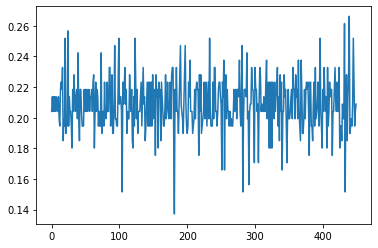

In [ ]:
stationary_timeseries = coeffs.predict(X)

plt.plot(stationary_timeseries)

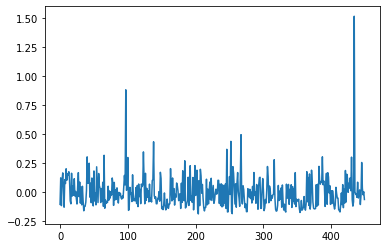

In [ ]:
residual = df['note_lengths'] - stationary_timeseries

plt.plot(residual)

### Pitches

In [ ]:
for i in range(1, 15):
  print(df['pitch'].autocorr(lag=i))

pitch_autocorr = [df['pitch'].autocorr(lag=i) for i in range(1, 20)]
print(pitch_autocorr)

0.7030642526961793
0.47587535580180385
0.2974103040805971
0.22248237555374528
0.19739629422145782
0.20798016044104115
0.2032381128109502
0.1268452692789457
0.02245131546681643
-0.059857156117539355
-0.06472616449458478
-0.0726092103538262
-0.03084685157699628
-0.03794778953448314
[0.7030642526961793, 0.47587535580180385, 0.2974103040805971, 0.22248237555374528, 0.19739629422145782, 0.20798016044104115, 0.2032381128109502, 0.1268452692789457, 0.02245131546681643, -0.059857156117539355, -0.06472616449458478, -0.0726092103538262, -0.03084685157699628, -0.03794778953448314, -0.04538447936529851, -0.07323092778243448, -0.09158143237729469, -0.11273800607693207, -0.07692298311693586]


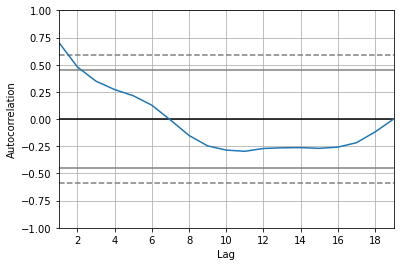

In [ ]:
pd.plotting.autocorrelation_plot(pitch_autocorr)

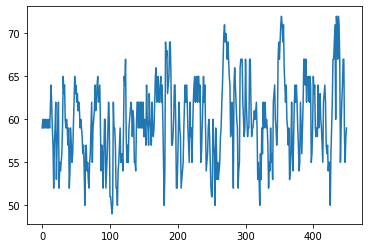

In [ ]:
df['pitch'].plot.line()

In [ ]:
adf = sm.tsa.stattools.adfuller(df['pitch'])
print(adf)

(-6.010344717258276, 1.5789581051357013e-07, 8, 441, {'1%': -3.4452655826028318, '5%': -2.868116205869215, '10%': -2.570272878944473}, 2276.2320199460414)


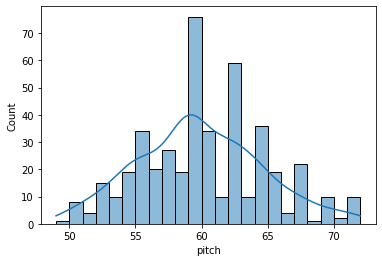

In [ ]:
sns.histplot(df['pitch'], kde=True, binwidth=1)

In [ ]:
df.corr()

,0,pitch_differences,abs_pitch_differences,velocities,note_lengths,pitch
0,1.000000,-0.061628,0.248994,-0.178110,0.551211,-0.044195
pitch_differences,-0.061628,1.000000,0.015578,-0.071242,-0.120783,-0.385301
abs_pitch_differences,0.248994,0.015578,1.000000,-0.045845,0.069015,-0.070434
velocities,-0.178110,-0.071242,-0.045845,1.000000,-0.158113,0.237051
note_lengths,0.551211,-0.120783,0.069015,-0.158113,1.000000,0.100938
pitch,-0.044195,-0.385301,-0.070434,0.237051,0.100938,1.000000


In [ ]:
df['pitch_lag1'] = df['pitch'].shift(1)
df['pitch_lag2'] = df['pitch'].shift(2)
df['pitch_lag3'] = df['pitch'].shift(3)
df['pitch_lag4'] = df['pitch'].shift(4)

# A Slightly Less Boring Model

This model will use the simple linear regressions between note lengths and pitch difference, and velocity and pitch difference to create a MIDI file that sounds less robotic if still somewhat boring.

In [ ]:
generating_seed = 8
# categories correspond to the pitch classes in pretty_midi (0 = C, 1 = C#, ..., 11 = B)
categories = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
notes = np.array([])
notes = np.append(notes, generating_seed)
for note in range(100):
  probs = normalized_transition_matrix[generating_seed]
  next_generating_seed = np.random.choice(categories, p=probs)
  notes = np.append(notes, next_generating_seed)
  generating_seed = next_generating_seed

note_diffs = np.diff(notes)
generated_note_lengths = note_lengths_reg.predict(note_diffs)

# add to MIDI file
markov_generation = pretty_midi.PrettyMIDI(initial_tempo=200)
inst = pretty_midi.Instrument(program=66, is_drum=False, name='Tenor Sax')
markov_generation.instruments.append(inst)
velocity = 100
for pitch, start, end in zip(notes, [x for x in range(len(notes))], [x+1.0 for x in range(len(notes))]):
    inst.notes.append(pretty_midi.Note(int(velocity), int(pitch)+48, start, end))
print(inst.notes)

In [ ]:
generating_seed = 10

categories = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
notes = np.array([])
notes = np.append(notes, generating_seed)
for note in range(100):
  probs = normalized_transition_matrix[generating_seed]
  next_generating_seed = np.random.choice(categories, p=probs)
  notes = np.append(notes, next_generating_seed)
  generating_seed = next_generating_seed

note_diffs = np.diff(notes)

X = note_diffs
X = sm.add_constant(X)
generated_note_lengths = note_lengths_reg.predict(X)
generated_velocities = velocity_reg.predict(X)

In [ ]:
print(generated_note_lengths)
print(len(generated_note_lengths))

[0.22325897 0.23281896 0.165899   0.21847897 0.24237895 0.19935898
 0.22803896 0.16111901 0.25671895 0.15633901 0.20891898 0.25671895
 0.20413898 0.20413898 0.21369897 0.19935898 0.21847897 0.165899
 0.20891898 0.26149894 0.15633901 0.25193895 0.165899   0.21847897
 0.22803896 0.21369897 0.19935898 0.20413898 0.20413898 0.23759896
 0.20413898 0.21847897 0.20413898 0.19457898 0.20413898 0.18501899
 0.23281896 0.21847897 0.21847897 0.19935898 0.21369897 0.20413898
 0.22803896 0.165899   0.19935898 0.26149894 0.15633901 0.23759896
 0.20891898 0.21847897 0.20413898 0.21847897 0.165899   0.23281896
 0.18979899 0.25671895 0.15633901 0.20891898 0.26149894 0.19935898
 0.18979899 0.20413898 0.18979899 0.26149894 0.20413898 0.20413898
 0.20891898 0.165899   0.20891898 0.23759896 0.18979899 0.23281896
 0.21847897 0.165899   0.21847897 0.20891898 0.19935898 0.23281896
 0.20413898 0.19935898 0.24237895 0.165899   0.25193895 0.21369897
 0.20413898 0.19935898 0.20413898 0.20413898 0.20413898 0.204138

In [ ]:
cumulative_note_lengths = np.cumsum(generated_note_lengths)
print(cumulative_note_lengths)
note_starts = cumulative_note_lengths - generated_note_lengths
print(note_starts)
note_ends = cumulative_note_lengths

[ 0.22325897  0.45607793  0.62197693  0.8404559   1.08283485  1.28219384
  1.5102328   1.6713518   1.92807075  2.08440976  2.29332873  2.55004768
  2.75418666  2.95832564  3.17202461  3.37138359  3.58986256  3.75576156
  3.96468054  4.22617948  4.38251849  4.63445744  4.80035644  5.01883541
  5.24687437  5.46057335  5.65993233  5.86407131  6.06821029  6.30580924
  6.50994822  6.72842719  6.93256617  7.12714515  7.33128413  7.51630312
  7.74912208  7.96760105  8.18608002  8.385439    8.59913798  8.80327696
  9.03131592  9.19721492  9.3965739   9.65807285  9.81441185 10.05201081
 10.26092979 10.47940876 10.68354774 10.90202671 11.06792571 11.30074467
 11.49054366 11.7472626  11.90360161 12.11252059 12.37401953 12.57337851
 12.7631775  12.96731648 13.15711546 13.41861441 13.62275338 13.82689236
 14.03581134 14.20171034 14.41062932 14.64822827 14.83802726 15.07084622
 15.28932519 15.45522419 15.67370316 15.88262214 16.08198112 16.31480008
 16.51893906 16.71829804 16.960677   17.126576   17

In [ ]:
better_markov_generation = pretty_midi.PrettyMIDI(initial_tempo=200)
inst = pretty_midi.Instrument(program=66, is_drum=False, name='Tenor Sax')
better_markov_generation.instruments.append(inst)



for pitch, velocity, start, end in zip(notes, generated_velocities, note_starts, note_ends):
    inst.notes.append(pretty_midi.Note(int(velocity), int(pitch)+48, start, end))
print(inst.notes)

[Note(start=0.000000, end=0.223259, pitch=58, velocity=103), Note(start=0.223259, end=0.456078, pitch=55, velocity=103), Note(start=0.456078, end=0.621977, pitch=50, velocity=101), Note(start=0.621977, end=0.840456, pitch=59, velocity=103), Note(start=0.840456, end=1.082835, pitch=57, velocity=103), Note(start=1.082835, end=1.282194, pitch=50, velocity=102), Note(start=1.282194, end=1.510233, pitch=52, velocity=103), Note(start=1.510233, end=1.671352, pitch=48, velocity=100), Note(start=1.671352, end=1.928071, pitch=58, velocity=104), Note(start=1.928071, end=2.084410, pitch=48, velocity=100), Note(start=2.084410, end=2.293329, pitch=59, velocity=102), Note(start=2.293329, end=2.550048, pitch=59, velocity=104), Note(start=2.550048, end=2.754187, pitch=49, velocity=102), Note(start=2.754187, end=2.958326, pitch=50, velocity=102), Note(start=2.958326, end=3.172025, pitch=51, velocity=102), Note(start=3.172025, end=3.371384, pitch=50, velocity=102), Note(start=3.371384, end=3.589863, pitc

In [ ]:
better_markov_generation.write('better_test_file.mid')

# The Glorious LSTM Model

In [ ]:
pitchnames = sorted(set(item for item in df['pitch']))
note_to_int = dict((note, number) for number, note in enumerate(pitchnames))
print(note_to_int)

sequence_length = 10
pitch_inputs = []
pitch_outputs = []

for i in range(0, len(df['pitch']) - sequence_length, 1):
    sequence_in = df['pitch'][i:i + sequence_length]
    sequence_out = df['pitch'][i + sequence_length]
    pitch_inputs.append([note_to_int[char] for char in sequence_in])
    pitch_outputs.append(note_to_int[sequence_out])

{49.0: 0, 50.0: 1, 51.0: 2, 52.0: 3, 53.0: 4, 54.0: 5, 55.0: 6, 56.0: 7, 57.0: 8, 58.0: 9, 59.0: 10, 60.0: 11, 61.0: 12, 62.0: 13, 63.0: 14, 64.0: 15, 65.0: 16, 66.0: 17, 67.0: 18, 68.0: 19, 69.0: 20, 70.0: 21, 71.0: 22, 72.0: 23}


In [ ]:
import tensorflow as tf
pitch_inputs = np.reshape(pitch_inputs, (len(pitch_inputs), sequence_length, 1))
pitch_outputs = tf.keras.utils.to_categorical(pitch_outputs, num_classes=24)
pitch_outputs = np.asarray(pitch_outputs)
#pitch_outputs = np.reshape(pitch_outputs, (len(pitch_outputs), 24, 1))

In [ ]:
pitch_inputs = np.asarray(pitch_inputs)

In [ ]:
print(dummies[10])
print(dummies[9])
print(dummies.shape)

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
(450, 24)


In [ ]:
print(pitch_inputs.shape)
print(pitch_outputs.shape)

(440, 10, 1)
(440, 24, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Activation
from tensorflow.keras.losses import sparse_categorical_crossentropy

model = Sequential()
model.add(LSTM(256, input_shape = (pitch_inputs.shape[1], pitch_inputs.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
print(pitch_inputs.shape)
print(pitch_outputs.shape)

(440, 10, 1)
(440, 24)


In [ ]:
model.fit(pitch_inputs, pitch_outputs, epochs=200, batch_size=64)

Epoch 1/200


ValueError: ignored